## Algoritmo K-Nearest Neighbor para classificar cores de acordo com seu RGB
Temos uma base de dados com quatro colunas (R, G, B, label) e queremos prever a qual cor (label) determinado exemplo pertence a partir dos seus valores em R (red), G (green), B (blue).

**Importando as bibliotecas**

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math

**Criando um dataframe a partir da importação do dataset em .csv**

In [5]:
df = pd.read_csv('dados.csv', sep=',')

In [6]:
df

,vermelho,verde,azul,label
0,20,139,240,Azul
1,174,83,72,Marrom
2,144,249,131,Verde
3,168,25,156,Rosa
4,30,182,136,Verde
...,...,...,...,...
5047,26,26,26,Preto
5048,27,27,27,Preto
5049,28,28,28,Preto
5050,29,29,29,Preto


**Dividindo em set de treino e set de teste**

In [50]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='label')
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Aplicando o modelo KNN no dataset**

In [95]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

**Conjunto de Treino**

In [96]:
df_train = X_train.assign(label = y_train)
df_train

,vermelho,verde,azul,label
1017,53,123,80,Verde
557,197,30,165,Rosa
2620,1,70,113,Azul
1207,213,2,18,Vermelho
4092,34,50,35,Verde
...,...,...,...,...
4426,234,33,226,Rosa
466,239,173,169,Vermelho
3092,234,223,24,Amarelo
3772,62,165,196,Azul


**Conjunto de Testes**

In [97]:
df_test = X_test.assign(label = y_test)
df_test

,vermelho,verde,azul,label
4712,120,177,46,Verde
691,65,137,194,Azul
65,68,240,4,Verde
2351,125,157,28,Verde
4684,117,128,20,Verde
...,...,...,...,...
4010,42,45,13,Verde
2948,20,62,143,Azul
1971,122,81,226,Roxo
4311,167,131,108,Marrom


**Relatórios de Desempenho**

In [98]:
y_true = y_test.values.tolist()
y_pred = clf.predict(X_test)

In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

     Amarelo       0.80      0.75      0.77        96
        Azul       0.90      0.92      0.91       365
      Branco       0.62      0.89      0.73         9
       Cinza       0.72      0.81      0.76        57
     Laranja       0.67      0.75      0.71        55
      Marrom       0.78      0.81      0.80       124
       Preto       0.81      0.81      0.81        16
        Rosa       0.82      0.87      0.84       180
        Roxo       0.83      0.73      0.78       184
       Verde       0.92      0.92      0.92       500
    Vermelho       0.85      0.73      0.78        82

    accuracy                           0.86      1668
   macro avg       0.79      0.82      0.80      1668
weighted avg       0.86      0.86      0.86      1668



**Plotando a Matriz de Confusão**

In [100]:
from sklearn.metrics import confusion_matrix
y_labels = list(set(y_train))
cm = confusion_matrix(y_true, y_pred, labels=y_labels)

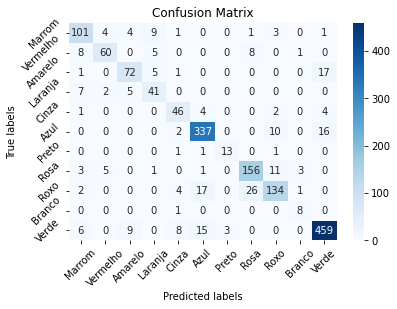

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt   

#Criando o gráfico de calor com seaborn
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues');  

# Configurando os labels do gráfico
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(y_labels, rotation=45); ax.yaxis.set_ticklabels(y_labels, rotation=45);